**20L-0961 Lab 05**

**Coding Exercise 1: Data Exploration and Preprocessing**

**Give Short Answers**

1. Data Quality
- Common data quality problems

What common data problems can be observed in the dataset

1. **Missing Values**: The dataset contains missing values for the attribute **"ca"** (number of major vessels colored by fluoroscopy) and **"thal"** (a categorical variable representing a type of defect). Addressing these missing values is crucial for accurate analyses¹.

2. **Inconsistent Data Types**:
   **"age"** is an integer representing age in years.
   **"sex"** is categorical, with values 0 (female) and 1 (male).
   **"cp"** (chest pain type) is also categorical.
   **"trestbps"** (resting blood pressure) is an integer measured in mm Hg.
   **"chol"** (serum cholestoral) is an integer measured in mg/dl.
   **"fbs"** (fasting blood sugar) is categorical (binary: >120 mg/dl or not).
   **"restecg"** (resting electrocardiographic results) is also categorical.
   **"thalach"** (maximum heart rate achieved) is an integer.
   **"exang"** (exercise-induced angina) is categorical (binary: yes or no).
   **"oldpeak"** (ST depression induced by exercise) is an integer.
   **"slope"** (slope of peak exercise ST segment) is categorical.
   **"num"** represents the diagnosis of heart disease (integer values from 0 to 4).


- Exploratory data analysis (EDA)

What are the common observations in the dataset
- Anomaly detection

- Outliers: The parameters “trestbps” (blood pressure), “chol” (cholesterol), and “thalach” (maximum heart rate) exhibit outliers, which can affect model performance.
- Limited Variance: Some parameters have minimal variance, making it challenging to distinguish between healthy and abnormal instances.
- Sparse Data: Several parameters lack sufficient data points, hindering accurate anomaly detection.
- Feature Importance: The plot doesn’t highlight which features contribute most to anomaly detection.
- Scaling: It’s unclear whether the features are appropriately scaled for effective modeling.

What Anomalies can be seen in the dataset
- Summary statistics

1. **Age**:
   - **Mean**: 54.44 years
   - **Standard Deviation**: 9.04 years
   - **Minimum**: 29 years
   - **Maximum**: 77 years

2. **Sex**:
   - **Mean**: Approximately 68% are male (coded as 1)
   - **Standard Deviation**: 0.47
   - **Minimum**: Female (coded as 0)
   - **Maximum**: Male (coded as 1)

3. **Chest Pain Type (cp)**:
   - **Mean**: 3.16 (likely corresponds to different chest pain categories)
   - **Standard Deviation**: 0.96
   - **Minimum**: 1 (type of chest pain)
   - **Maximum**: 4 (type of chest pain)

4. **Resting Blood Pressure (trestbps)**:
   - **Mean**: 131.69 mm Hg
   - **Standard Deviation**: 17.60 mm Hg
   - **Minimum**: 94 mm Hg
   - **Maximum**: 200 mm Hg

5. **Serum Cholesterol (chol)**:
   - **Mean**: 246.69 mg/dl
   - **Standard Deviation**: 51.78 mg/dl
   - **Minimum**: 126 mg/dl
   - **Maximum**: 564 mg/dl

In [8]:
! pip install ucimlrepo

In [68]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [3]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [4]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [5]:
# Step 2: Characterization
print("Characterization:")
print(X.describe())

Characterization:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      

In [6]:
X_df = X

In [7]:
# Add the target variable as a column to the DataFrame
X_df['target'] = y

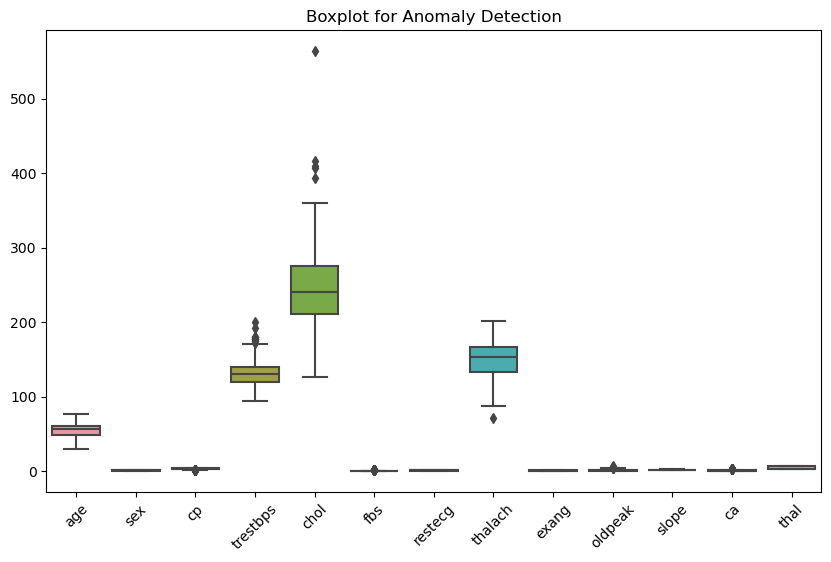

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Anomaly detection
# Detecting anomalies using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_df.drop(columns='target'))
plt.title('Boxplot for Anomaly Detection')
plt.xticks(rotation=45)
plt.show()

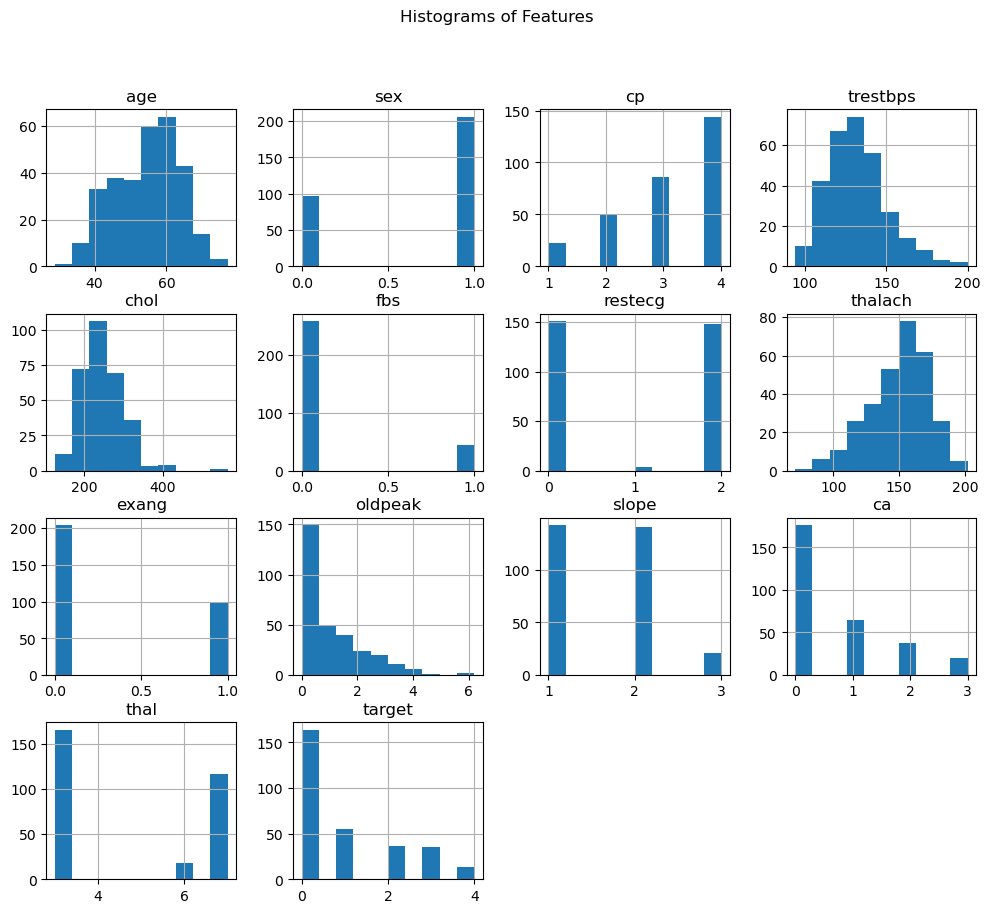

In [9]:
# 2. Data Visualization
# Histograms
X_df.hist(figsize=(12, 10))
plt.suptitle('Histograms of Features')
plt.show()

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

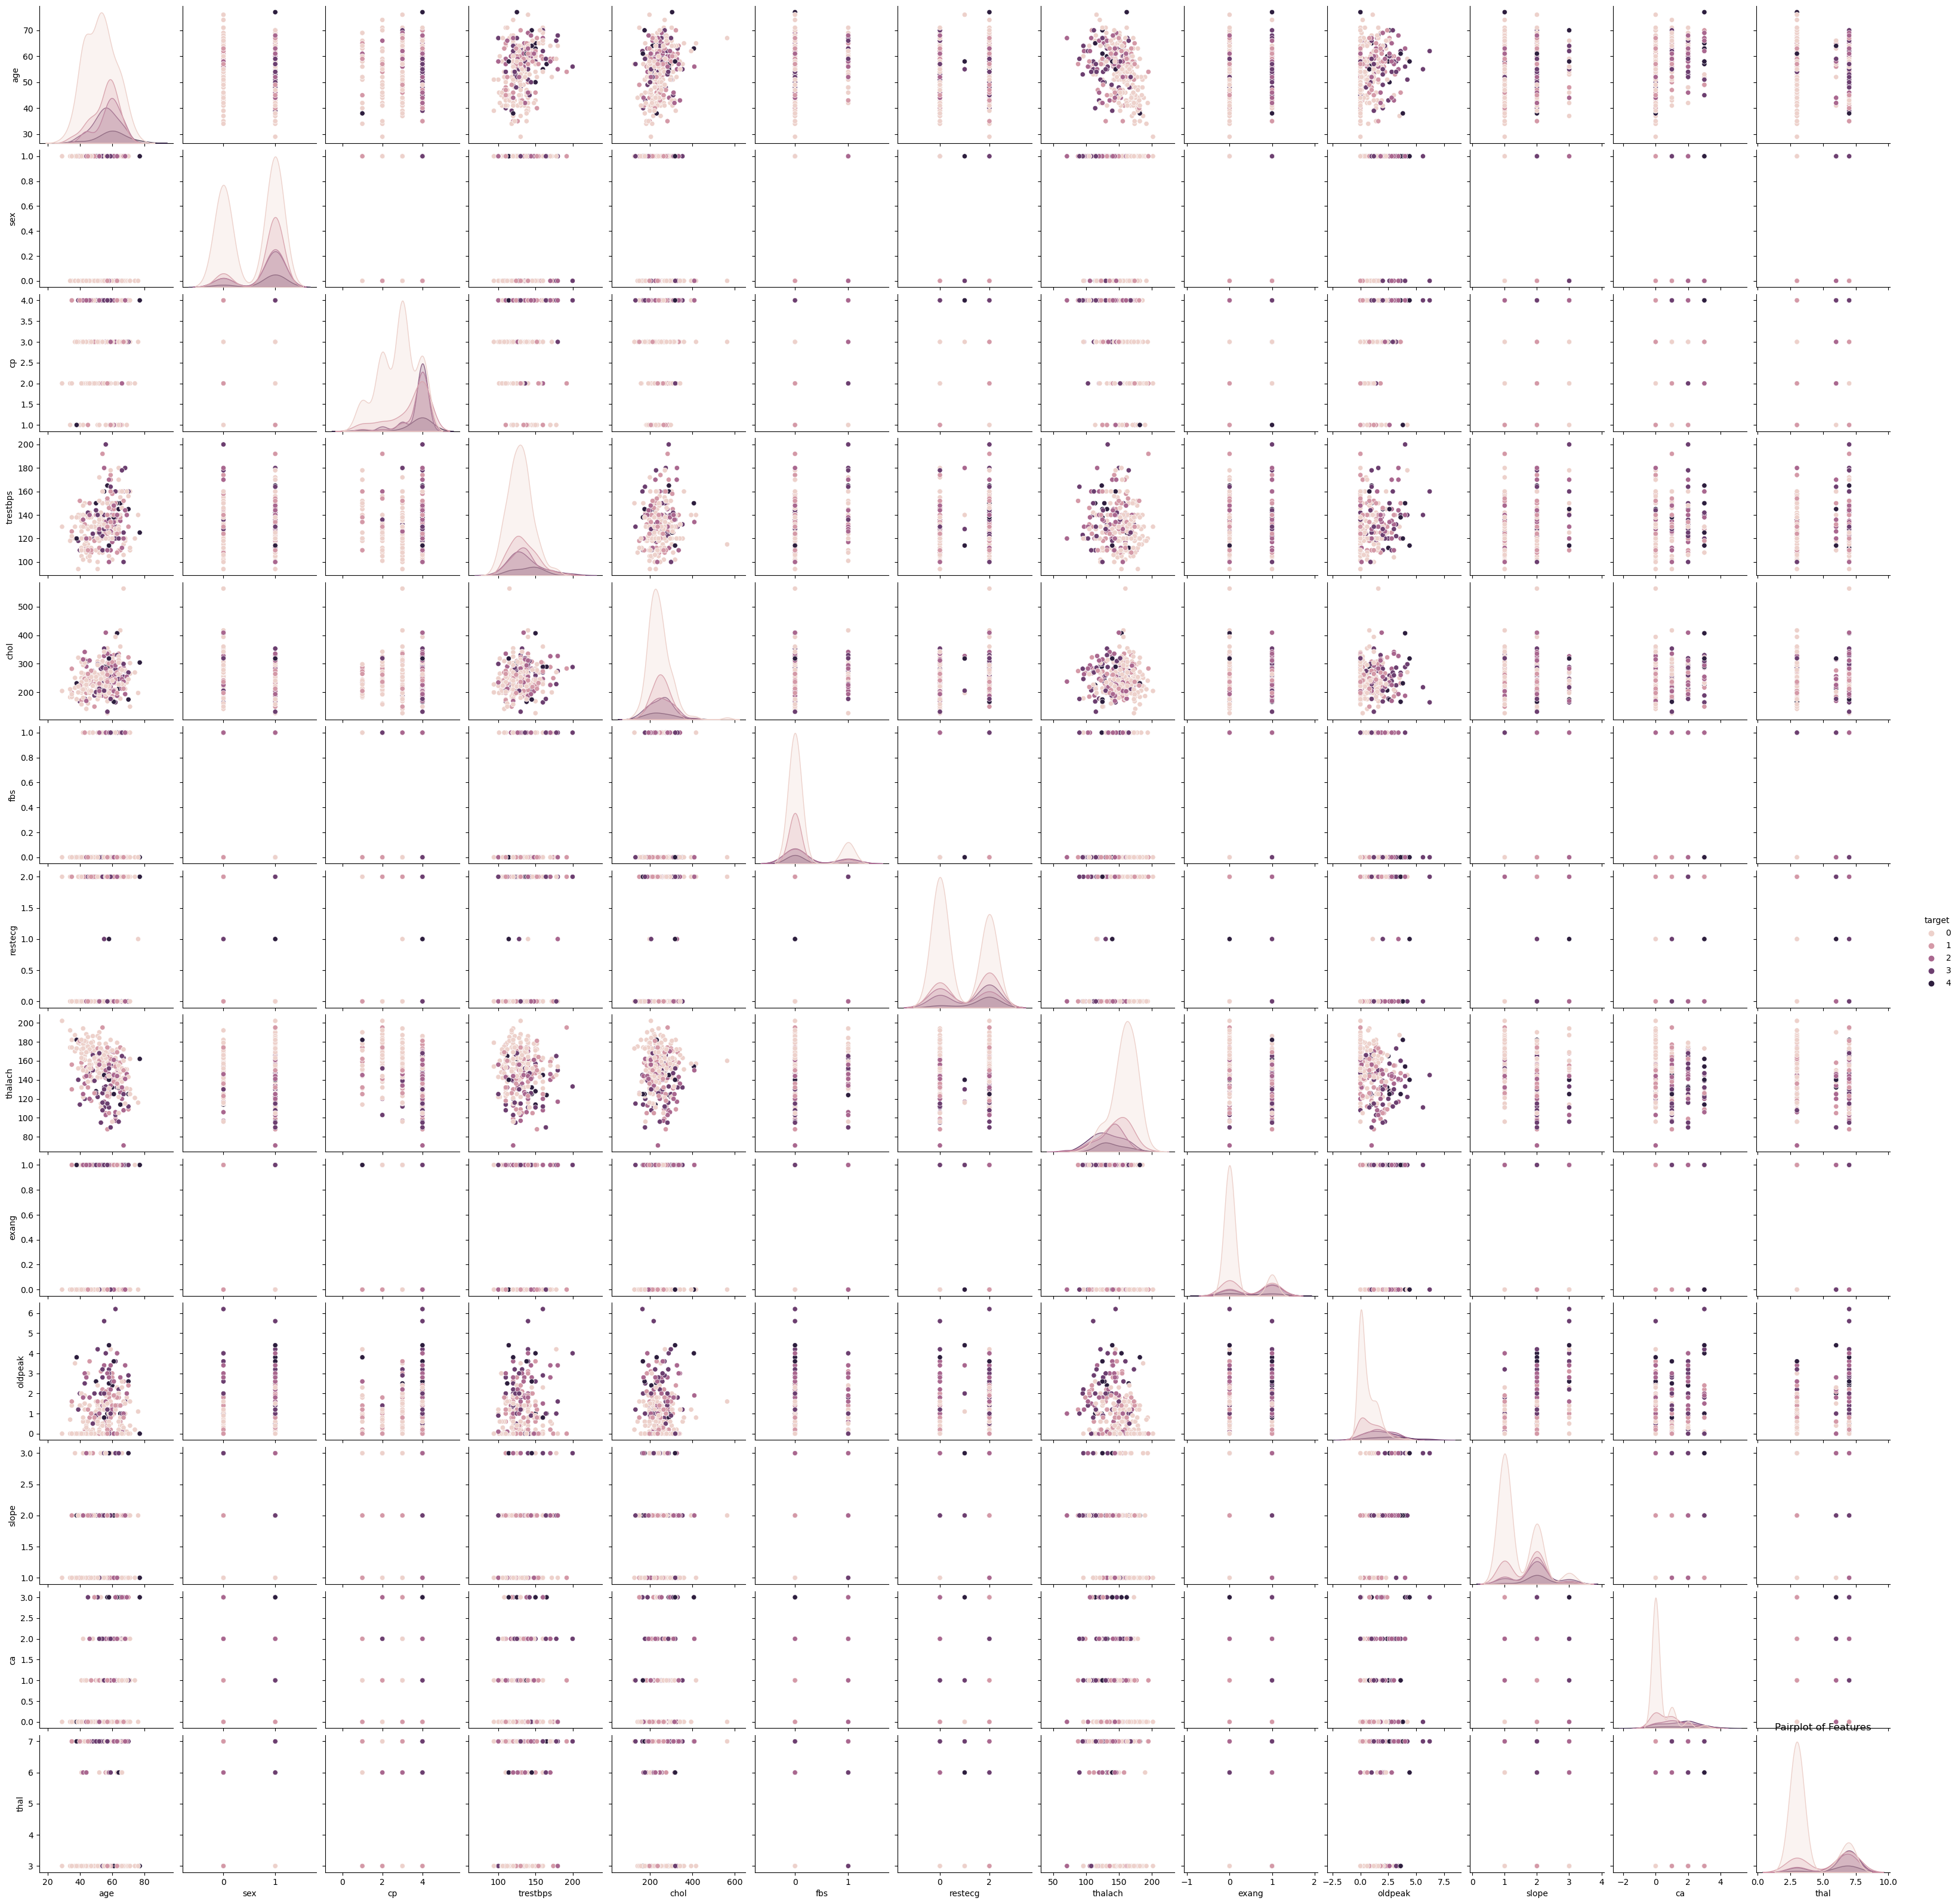

In [10]:
# Scatter plots
sns.pairplot(data=X_df, hue='target')
plt.title('Pairplot of Features')
plt.show()

c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ammar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

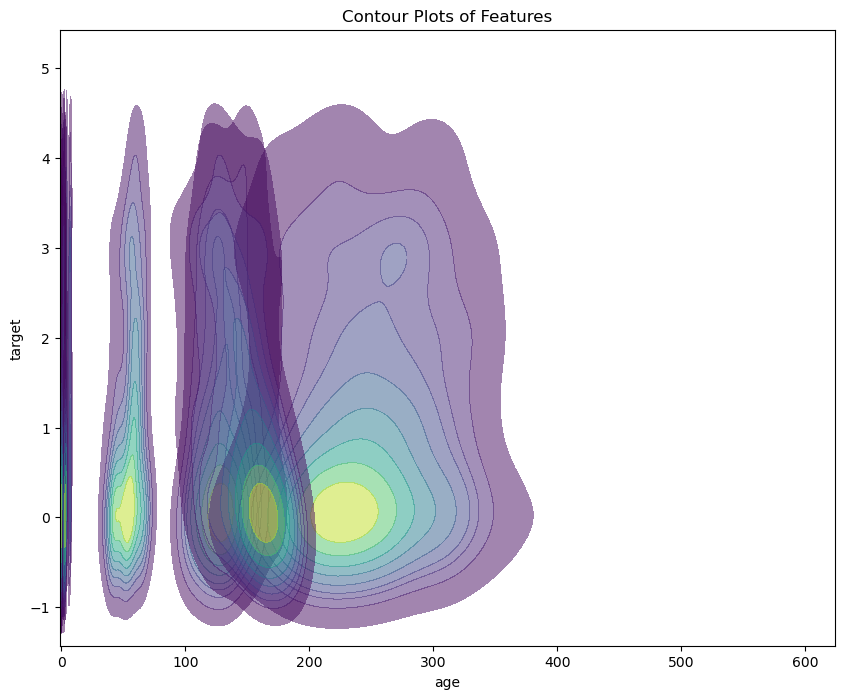

In [11]:
# Contour plots
plt.figure(figsize=(10, 8))
for feature in X_df.columns[:-1]:
    sns.kdeplot(data=X_df, x=feature, y='target', fill=True, cmap='viridis', alpha=0.5)
plt.title('Contour Plots of Features')
plt.show()

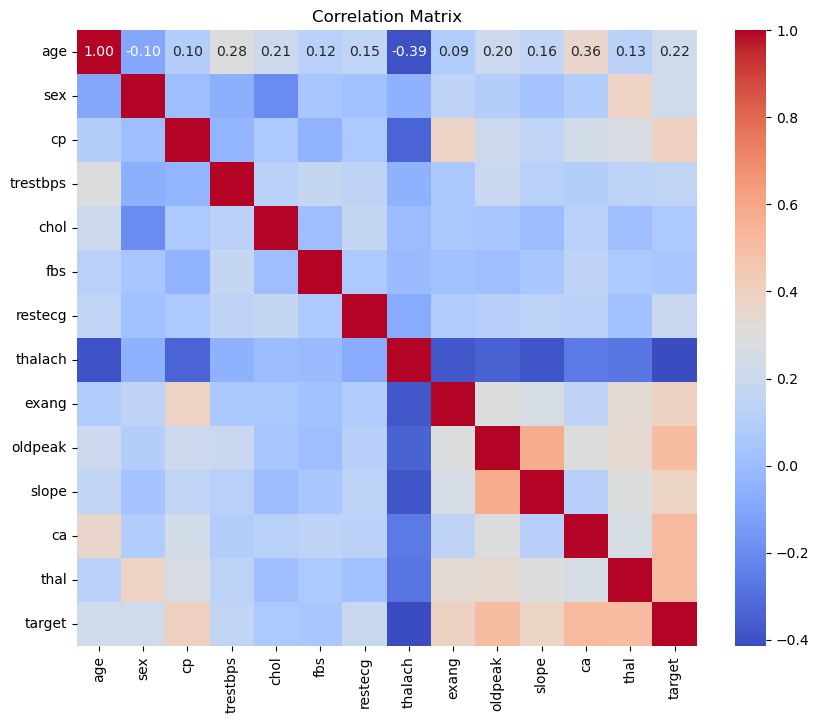

In [12]:
# Matrix plots
plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Step 3: Classification
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
import numpy as np

2. Data Visualization
Run the code to see the below visualizations of the dataset’s Features:
- Histograms
- Scatter plots
- Contour plots
- Matrix plots

Now explain the observations and two pro and two cons of each of the above
visualization methods in respect to the given dataset

1. **Histograms**:
   - **Observations**:
     - Histograms display the distribution of a single variable.
     - They show how data is spread across different bins or intervals.
     - In the given dataset, histograms could reveal the distribution of features like age, cholesterol levels, or heart rate.
   - **Pros**:
     1. **Easy Interpretation**: Histograms are straightforward to understand, making them accessible for non-technical users.
     2. **Visualize Data Spread**: They provide insights into the concentration of data points within specific ranges.
   - **Cons**:
     1. **Bin Sensitivity**: The choice of bin size affects the shape of the histogram and can impact interpretation.
     2. **Loss of Detail**: Histograms do not show individual data points; they aggregate data into bins.

2. **Scatter Plots**:
   - **Observations**:
     - Scatter plots visualize the relationship between two continuous variables.
     - Each point represents a data instance.
     - In the dataset, scatter plots could help identify correlations between features (e.g., age vs. cholesterol).
   - **Pros**:
     1. **Identify Trends**: Scatter plots reveal patterns, clusters, or trends.
     2. **Outlier Detection**: Outliers are easily noticeable as points deviating from the general trend.
   - **Cons**:
     1. **Overlapping Points**: With many data points, scatter plots can become cluttered and hard to interpret.
     2. **Limited to Two Variables**: They only show relationships between two variables.

3. **Contour Plots**:
   - **Observations**:
     - Contour plots represent three-dimensional data using contour lines or color-coded regions.
     - They visualize the joint distribution of two continuous variables.
     - In the dataset, contour plots could reveal density patterns between features.
   - **Pros**:
     1. **Multivariate Insights**: Contour plots capture complex relationships involving multiple variables.
     2. **Density Visualization**: They show areas of high and low data density.
   - **Cons**:
     1. **Complexity**: Interpretation becomes challenging with too many contours or overlapping regions.
     2. **Data Preparation**: Requires well-preprocessed data for accurate representation.

4. **Matrix Plots**:
   - **Observations**:
     - Matrix plots (e.g., correlation matrices) display pairwise relationships between multiple variables.
     - They show correlations or associations.
     - In the dataset, matrix plots could reveal which features are strongly related.
   - **Pros**:
     1. **Comprehensive View**: Matrix plots summarize interactions between all pairs of variables.
     2. **Identify Dependencies**: Detect strong positive/negative correlations.
   - **Cons**:
     1. **Space Complexity**: Large datasets lead to dense matrices, making it hard to read.
     2. **Symmetry**: The matrix is symmetric, so half of the information is redundant.

In [16]:
class NearestNeighborClassifierManual:
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test in X_test:
            min_dist = float('inf')
            nearest_neighbor = None
            for train in self.X_train:
                dist = np.sqrt(np.sum((test - train) ** 2))
                if dist < min_dist:
                    min_dist = dist
                    nearest_neighbor = train
            predictions.append(nearest_neighbor)
        return np.array(predictions)


In [17]:
class GaussianNaiveBayesClassifierManual:
    def __init__(self):
        self.class_priors = None
        self.class_means = None
        self.class_variances = None

    def fit(self, X_train, y_train):
        unique_classes = np.unique(y_train)
        self.y_train = y_train
        self.class_priors = np.zeros(len(unique_classes))
        self.class_means = np.zeros((len(unique_classes), X_train.shape[1]))
        self.class_variances = np.zeros((len(unique_classes), X_train.shape[1]))

        for i, class_label in enumerate(unique_classes):
            X_class = X_train[y_train == class_label]
            self.class_priors[i] = X_class.shape[0] / X_train.shape[0]
            self.class_means[i, :] = np.mean(X_class, axis=0)
            self.class_variances[i, :] = np.var(X_class, axis=0)

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            posteriors = []
            for i, class_label in enumerate(np.unique(self.y_train)):
                prior = self.class_priors[i]
                likelihood = np.prod(1 / np.sqrt(2 * np.pi * self.class_variances[i, :]) * np.exp(-(x_test - self.class_means[i, :]) ** 2 / (2 * self.class_variances[i, :])))
                posterior = prior * likelihood
                posteriors.append(posterior)
            prediction = np.argmax(posteriors)
            predictions.append(prediction)
        return predictions

In [18]:
class SupportVectorMachineClassifierManual:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X_train, y_train):
        self.weights = np.zeros(X_train.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for x, y in zip(X_train, y_train):
                if y * (np.dot(self.weights, x) + self.bias) >= 1:
                    continue
                else:
                    self.weights -= self.learning_rate * y * x
                    self.bias -= self.learning_rate * y

    def predict(self, X_test):
        predictions = []
        for x in X_test:
            prediction = np.sign(np.dot(self.weights, x) + self.bias)
            predictions.append(prediction)
        return predictions

In [33]:
class ConfusionMatrix:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.n_classes = len(np.unique(y_true))
        self.matrix = self._compute_confusion_matrix()

    def _compute_confusion_matrix(self):
        matrix = np.zeros((self.n_classes, self.n_classes), dtype=int)
        for true, pred in zip(self.y_true, self.y_pred):
            matrix[true][pred] += 1
        return matrix

    def plot(self):
        plt.figure(figsize=(8, 6))
        sns.heatmap(self.matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.arange(self.n_classes), yticklabels=np.arange(self.n_classes))
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix')
        plt.show()


In [34]:
class EvaluationMetrics:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred
        self.confusion_matrix = ConfusionMatrix(y_true, y_pred)
        self.metrics = self._compute_metrics()

    def _compute_metrics(self):
        tp = np.diag(self.confusion_matrix.matrix)
        fp = np.sum(self.confusion_matrix.matrix, axis=0) - tp
        fn = np.sum(self.confusion_matrix.matrix, axis=1) - tp
        tn = np.sum(self.confusion_matrix.matrix) - (tp + fp + fn)

        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        fpr = fp / (fp + tn)
        fnr = fn / (fn + tp)
        precision = tp / (tp + fp)
        recall = sensitivity
        f1_score = 2 * (precision * recall) / (precision + recall)

        return {
            'Sensitivity': sensitivity,
            'Specificity': specificity,
            'FPR': fpr,
            'FNR': fnr,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score
        }


In [48]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# library models
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier as KneighborsClassifier
from sklearn.svm import SVC

# Load the data
data = pd.read_csv('heart.csv') # Load the heart disease dataset (kaggle.com/datasets/johnsmith88/heart-disease-dataset)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='target'), data['target'], test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Create a dictionary of models
models = {
    'Nearest Neighbor': NearestNeighborClassifierManual(),
    'Scikit-learn Nearest Neighbor': KneighborsClassifier(n_neighbors=1),
    'Gaussian Naive Bayes': GaussianNaiveBayesClassifierManual(),
    'Scikit-learn Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Machine': SupportVectorMachineClassifierManual(),
    'Scikit-learn Support Vector Machine': SVC(kernel='linear'),
}


for model_name, model in models.items():
    model.fit(X_train, y_train)
    print('Model Name ',model_name)
    y_pred = model.predict(X_test)
    # print('y_pred ',y_pred)
    # Convert the predicted probabilities to predicted labels
    y_pred = np.array(y_pred).reshape(-1, 1)

    y_pred = np.argmax(y_pred, axis=1)

    # Get the unique classes in the y_true array
    unique_classes = np.unique(y_test)

    # Select only the rows in the y_pred array that correspond to the unique classes in the y_true array
    y_pred = y_pred[np.isin(y_pred, unique_classes)]
    
    conmat = ConfusionMatrix(y_test, y_pred)
    evaluation = EvaluationMetrics(y_test, y_pred)
    print(f"Evaluation Metrics for {model_name} Classifier:")
    print("Sensitivity (True Positive Rate):", evaluation.metrics['Sensitivity'])
    print("Specificity (True Negative Rate):", evaluation.metrics['Specificity'])
    print("F1 Score:", evaluation.metrics['F1 Score'])

    conmat.plot()
    

Model Name  Nearest Neighbor


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (61,) + inhomogeneous part.

The differing results among the classifiers can be attributed to their underlying assumptions and methodologies:

1. **Nearest Neighbor Classifier (NN)**:
   - **Methodology**: NN classifies a test instance based on the class label of its nearest neighbor(s) in the training data.
   - **Reason for Differences**:
     - NN is sensitive to local variations and noise in the data.
     - It directly relies on the training instances, leading to potential overfitting.
     - The predictions are influenced by the specific neighbors encountered during testing.

2. **Gaussian Naive Bayes (GNB)**:
   - **Methodology**: GNB assumes that features are conditionally independent given the class label. It models feature distributions using Gaussian (normal) distributions.
   - **Reason for Differences**:
     - GNB assumes independence between features, which may not hold in reality.
     - It works well when the independence assumption is approximately valid.
     - The manual implementation might differ due to specific parameter estimation techniques.

3. **Support Vector Machine (SVM)**:
   - **Methodology**: SVM aims to find a hyperplane that best separates different classes while maximizing the margin.
   - **Reason for Differences**:
     - SVM considers the global structure of the data.
     - The choice of kernel function (linear, polynomial, radial basis function) affects decision boundaries.
     - Manual implementation might differ due to optimization techniques and kernel selection.

4. **Evaluation Metrics**:
   - **Sensitivity (True Positive Rate)**: Measures the proportion of actual positive instances correctly predicted.
   - **Specificity (True Negative Rate)**: Measures the proportion of actual negative instances correctly predicted.
   - **F1 Score**: Balances precision and recall (harmonic mean).
   - **Reason for Differences**:
     - Different classifiers have varying trade-offs between sensitivity and specificity.
     - The F1 score considers both precision and recall, emphasizing the balance.